## Importing libraries

In [1]:
import sys
sys.path.append("I:/My Drive/suyana")
from scripts.utils.functions import *

import requests

In [2]:
import os
path = "I:/My Drive/suyana/data/capacity/"
files = os.listdir(path)
files = [f for f in files if f.endswith(".nc")]

id_canton = [files[i].split("_")[1].split(".")[0] for i in range(len(files))]

In [3]:
netcdf_file = xr.open_dataset(path + 'canton_52.nc')

In [9]:
netcdf_file.swc_adjusted.values

array([       nan, 0.34545495,        nan, ..., 0.22011429, 0.19428938,
              nan], shape=(8176,))

In [129]:
list_dates = []
list_swc = []
list_id = []
data = pd.DataFrame()
for file in files:
    id_canton = file.split("_")[1].split(".")[0]
    netcdf_file = xr.open_dataset(path + file)
    
    data_aux = pd.DataFrame({
        "date": netcdf_file.time.values,
        "swc": netcdf_file.swc_adjusted.values
    })
    data_aux["idCanton"] = id_canton

    data = pd.concat([data, data_aux], axis=0)

## Exploratory Data Analysis

In [62]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [140]:
netcdf_file.variables

Frozen({'swc_raw': <xarray.Variable (time: 8176)> Size: 65kB
array([     nan, 0.308279, 0.2454  , ..., 0.320967, 0.319731,      nan],
      shape=(8176,)), 'week': <xarray.Variable (time: 8176)> Size: 65kB
[8176 values with dtype=float64], 'swc_adjusted': <xarray.Variable (time: 8176)> Size: 65kB
array([     nan, 0.350339, 0.269238, ..., 0.320967, 0.319731,      nan],
      shape=(8176,)), 'time': <xarray.IndexVariable 'time' (time: 8176)> Size: 65kB
array(['2002-06-15T00:00:00.000000000', '2002-06-16T00:00:00.000000000',
       '2002-06-17T00:00:00.000000000', ..., '2024-10-29T00:00:00.000000000',
       '2024-10-30T00:00:00.000000000', '2024-10-31T00:00:00.000000000'],
      shape=(8176,), dtype='datetime64[ns]')})

In [64]:
data_summary = data.groupby(["idCanton", "year"]).size().reset_index()

In [65]:
## CANTIDAD DE OBSERVACIONES POR AÑO
data_summary.pivot(index="idCanton", columns="year", values=0)

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
idCanton,,,,,,,,,,,,,,,,,,,,,,,
43,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
45,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
49,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
50,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
51,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
52,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
53,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
54,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305
55,200,365,366,365,365,365,366,365,365,365,367,365,365,365,366,365,365,365,366,365,365,365,305


In [70]:
## DUPLICADOS
data[data.year==2012].groupby(["date", "idCanton"]).agg(n=("idCanton","count")).reset_index().query('n>1')

,date,idCanton,n
3485,2012-07-24,43,2
3486,2012-07-24,45,2
3487,2012-07-24,49,2
3488,2012-07-24,50,2
3489,2012-07-24,51,2
3490,2012-07-24,52,2
3491,2012-07-24,53,2
3492,2012-07-24,54,2
3493,2012-07-24,55,2
3494,2012-07-24,56,2


In [74]:
n_anios = len(data['year'].unique())
min_year = min(data['year'])
max_year = max(data['year'])
print(f'Cantidad de años: {nAnios} desde {min_year} hasta {max_year}')
n_dates = len(data['date'].unique())
min_date = min(data['date'])
max_date = max(data['date'])
print(f'Cantidad de días: {n_dates} desde {min_date} hasta {max_date}')

Cantidad de años: 23 desde 2002 hasta 2024
Cantidad de días: 8175 desde 2002-06-15 00:00:00 hasta 2024-10-31 00:00:00


## Data from gpkg cantones bolivia

In [13]:
df_cantones = gpd.read_file('I:/My Drive/suyana/data/drought/sub_AOIs_priority.gpkg')

In [14]:
df_cantones.head(4)

,id_canton,ogc_fid,entity,canton_original,provincia,municipio,departamen,area,canton,priority,geometry
0,14,1433,Polyline,Concepcion,Ńuflo de Chavez,Concepcion,Santa Cruz,1077.635625,Concepcion_13,False,"MULTIPOLYGON (((-61.49356 -15.20388, -61.49358..."
1,15,1433,Polyline,Concepcion,Ńuflo de Chavez,Concepcion,Santa Cruz,1173.543180,Concepcion_14,False,"MULTIPOLYGON (((-61.76111 -15.56341, -62.0375 ..."
2,16,1433,Polyline,Concepcion,Ńuflo de Chavez,Concepcion,Santa Cruz,2094.836374,Concepcion_15,False,"MULTIPOLYGON (((-61.56904 -15.56224, -61.5694 ..."
3,17,1433,Polyline,Concepcion,Ńuflo de Chavez,Concepcion,Santa Cruz,2195.671106,Concepcion_16,False,"MULTIPOLYGON (((-62.03581 -15.92269, -62.42771..."


## Data from API for yields panel data

In [15]:
# data_folder = Path("../Data/data_output_rendimiento")
# filename = "df_rendimiento_flagged_ONI.csv"
data_folder = "I:/My Drive/suyana/data/drought/"
filename = "yields_panel.csv"
df_yields = pd.read_csv(data_folder + filename)
df_yields.drop(['flag','notes', 'Unnamed: 10'], axis=1, inplace = True)

In [16]:
df_yields.head(4)

,producer_id,zone,lot,plot,orig_crop,variety,seedtime,harvest_date,show_furrow,n_plants_m,n_plants_ha,date_beginning_flowering,mature_maturation_date,plant_height,fertitilized,type_of_fertilizer,dose_kg_ha,rend_ton_ha,cond_climaticas_de_la_campana,producer_handling,id_lot,cultivation_id,culture,yr,summer,...,pp_anomaly_seed_date_minus_2_month,vhi_anomaly_seed_date_minus_2_month,ndvi_anomaly_flowering_date,ndpi_anomaly_flowering_date,pp_anomaly_flowering_date,vhi_anomaly_flowering_date,ndvi_flowering_date,ndpi_flowering_date,pp_flowering_date,vhi_flowering_date,ndvi_anomaly_flowering_date_minus_1_month,ndpi_anomaly_flowering_date_minus_1_month,pp_anomaly_flowering_date_minus_1_month,vhi_anomaly_flowering_date_minus_1_month,ndvi_anomaly_flowering_date_minus_2_month,ndpi_anomaly_flowering_date_minus_2_month,pp_anomaly_flowering_date_minus_2_month,vhi_anomaly_flowering_date_minus_2_month,Month,Year,ENSO,pixel_id,anomaly_sum,swc_sum,climatology_sum
0,16,Norte,H-2,Las Londras,Sorgo,Timbo,NaN,2016-09-13,0.45,11.0,244444.440,45,110,1.1,MAP,11-52-0,100,1.000000,NaN,NaN,67,2,SORGO,2016,0,...,-147.570695,-931.913044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,ninia,0.0,0.000000,0.0,0.000000
1,14,Este,B04,Europa,Maiz,Maiz 355,2013-03-10,2013-08-20,0.42,2.4,57142.857,5/14/2013,7/13/2013,2.1,0,0,0,1.994742,NaN,NaN,45,1,MAIZ,2013,0,...,-318.040930,-1266.048243,-573.160520,1.054872,7.770585,-25.339241,6219.065355,1.120897,18.280309,27.384402,-22986.655761,-4.350322,-99.537446,-883.337060,-36100.439166,1.791396,-109.046194,-1606.263388,8.0,2013.0,NaN,0.0,10141.265152,25988.0,15846.734848
2,14,Este,A09,Europa,Sorgo,DAS-5000,2013-03-19,2013-07-24,0.42,9.0,214285.710,5/3/2013,7/7/2013,1.1,0,0,0,2.323631,NaN,NaN,43,2,SORGO,2013,0,...,-252.626529,-1279.054223,1549.200627,0.287106,0.638863,-27.786188,6749.498087,0.222299,9.864622,24.390516,22223.058567,11.863377,107.183678,-914.857636,-14995.596168,0.469207,-157.261620,-1528.424227,7.0,2013.0,NaN,0.0,8117.090909,20801.0,12683.909091
3,12,Este,15-N,AgroOriente,Trigo,A9829R,2013-03-31,2013-08-09,0.17,50.0,2941176.500,5/9/2013,7/13/2013,NaN,0,0,0,NaN,Malo,Regular,27,5,TRIGO,2013,0,...,-503.627799,-390.735870,1530.561548,-0.418810,-6.299874,-9.022686,7196.695431,-0.459921,4.003364,38.563123,7854.427149,4.080776,32.109304,-470.953482,-18272.315065,1.485035,-102.000497,-793.850622,8.0,2013.0,NaN,0.0,8249.757576,20998.0,12748.242424


In [17]:
df_yields.columns

Index(['producer_id', 'zone', 'lot', 'plot', 'orig_crop', 'variety',
       'seedtime', 'harvest_date', 'show_furrow', 'n_plants_m', 'n_plants_ha',
       'date_beginning_flowering', 'mature_maturation_date', 'plant_height',
       'fertitilized', 'type_of_fertilizer', 'dose_kg_ha', 'rend_ton_ha',
       'cond_climaticas_de_la_campana', 'producer_handling', 'id_lot',
       'cultivation_id', 'culture', 'yr', 'summer', 'latitude', 'longitude',
       'flowering_date', 'seed_date', 'diff_date', 'closest_date_index_ndvi',
       'closest_date_index_ndpi', 'closest_date_index_pp',
       'closest_date_index_vhi', 'closest_id_grid', 'ndvi', 'ndpi', 'pp',
       'vhi', 'ndvi_anomaly', 'ndpi_anomaly', 'pp_anomaly', 'vhi_anomaly',
       'ndvi_anomaly_minus_1_month', 'ndpi_anomaly_minus_1_month',
       'pp_anomaly_minus_1_month', 'vhi_anomaly_minus_1_month',
       'ndvi_anomaly_minus_2_month', 'ndpi_anomaly_minus_2_month',
       'pp_anomaly_minus_2_month', 'vhi_anomaly_minus_2_month',
     

In [171]:
list_ids = pd.read_csv("I:/My Drive/suyana/data/available_areas.csv")
list_ids = list(list_ids['id_area'])
list_ids.sort()
list_ids[:2]

[43, 45]

In [18]:
df_aux = df_yields[['longitude', 'latitude']].drop_duplicates()
df_aux['coords'] = list(zip(df_aux['longitude'], df_aux['latitude']))

df_coords = gpd.GeoDataFrame({
    'longitude': list(df_aux['longitude']),
    'latitude': list(df_aux['latitude']),
    'geometry': [Point(p) for p in df_aux['coords']]
}, crs = df_cantones.crs)

df_join = df_coords.sjoin(
    df_cantones,
    how = 'left',
    predicate = 'within'
)

In [19]:
df_yields_final = df_yields.merge(
    df_join[['longitude', 'latitude', 'id_canton', 'canton_original', 'provincia', 'municipio', 'departamen']],
    how = 'left',
    on = ['longitude', 'latitude'],
)

In [21]:
df_yields_final.to_csv('I:/My Drive/suyana/data/drought/yields_panel_id.csv', index=False)

In [3]:
df_yields_final = pd.read_csv('I:/My Drive/suyana/data/drought/yields_panel_id.csv')

## Clean Raw Data from yields

In [4]:
def remove_duplicates_and_fill(ds):
    ds_unique = ds.drop_duplicates(..., keep='first')
    #df = ds.to_dataframe().reset_index()
    # Eliminar duplicados basados en 'time' para cada combinación única de 'lon' y 'lat'
    #df_unique = df.drop_duplicates(subset=['lon', 'lat', 'time'], keep = 'first')
    #(
    #    df.groupby(["lon", "lat"])
    #    .apply(lambda group: group.drop_duplicates(subset="time", keep="first"))
    #    .reset_index(drop=True)
    #)

    # Convertir de vuelta a xarray Dataset
    #ds_unique = df_unique.set_index(["lon", "lat", "time"]).to_xarray()

    return ds_unique

def clean_data(ds_2002_2011, ds_2012_2024):
    # Remove Duplicates
    ds_2002_2011 = remove_duplicates_and_fill(ds_2002_2011)
    ds_2012_2024 = remove_duplicates_and_fill(ds_2012_2024)

    # Concat
    ds = xr.concat(
        [
            ds_2002_2011,
            ds_2012_2024,
        ],
        dim="time",
    )

    ds["time"] = pd.to_datetime(ds["time"].values)

    ds = ds.reindex(
        time=pd.date_range(
            start=ds["time"].min().values, end=ds["time"].max().values, freq="D"
        )
    )

    # Fill Nans
    ds = ds.where(ds != 65535, np.nan)

    # Average all pixels
    #ds = ds.mean(dim=["lat", "lon"])
    
    # Remove data from 2024-2025 campaign
    ds = ds.sel(time=slice(None, "2024-10-31"))

    return ds

In [16]:
def empirical_cdf_matching(df_fix, df_base, group_cols, field):
    """
    Performs empirical CDF matching, handling NaN values.

    Args:
      x: The data to be adjusted.
      y: The reference data.

    Returns:
      The adjusted data.
    """

    df_base['index'] = df_base.groupby(group_cols)[field].rank(method="first")
    df_base = df_base.dropna(subset=[field],axis=0)

    df_base_size = df_base.groupby(group_cols).agg(
        size=(field, 'count')
    ).reset_index()

    df_base = df_base.rename({field: field+'_adjusted'}, axis=1)
    
    df_fix['rank'] = (
        df_fix.groupby(group_cols)[field].rank(method="max")
        / df_fix.groupby(group_cols)[field].transform('count')
    )
    
    df_fix = df_fix.merge(
        df_base_size,
        how = 'left',
        on = group_cols
    )

    df_fix['index'] = np.floor(df_fix['rank']*df_fix['size'])
    
    df_fix = df_fix.merge(
        df_base[group_cols +['index', field+'_adjusted']],
        how = 'left',
        on = group_cols + ['index']
    ).drop(labels=['index', 'size', 'rank'], axis=1)
    print(df_fix.columns)

    return df_fix

    
def cdf_matching_with_spatial_groupby(ds):
    # Define the periods
    period1_end = "2011-10-03"
    period2_start = "2012-07-24"

    # Create a week coordinate attached to the existing time dimension
    ds = ds.assign_coords(
        week = ("time", ds["time"].dt.isocalendar().week.values)
    )

    # Split the dataset into two periods
    ds_period1 = ds.sel(time=slice(None, period1_end))
    ds_period2 = ds.sel(time=slice(period2_start, None))

    df_fix = ds_period1.to_dataframe().reset_index()
    df_base = ds_period2.to_dataframe().reset_index()

    
    df_fix = empirical_cdf_matching(
        df_fix, df_base, ['lon','lat', 'week'], 'swc'
    )

    df_base['swc_adjusted'] = df_base['swc'] 

    #df_total = pd.concat([df_fix, df_base], axis=0)

    # Create an xarray Dataset
    ds_period1 = df_fix.set_index(['lon', 'lat', 'time']).to_xarray()
    ds_period1 = ds_period1.set_coords('week')

    ds_period2 = df_base.set_index(['lon', 'lat', 'time']).to_xarray()
    ds_period2 = ds_period2.set_coords('week')

    return ds_period1, ds_period2

In [17]:
import os
path = "I:/My Drive/suyana/data/capacity/"
files = os.listdir(path)
files = [f for f in files if not (f.endswith(".nc") or f.endswith(".zip"))]
id_canton = [files[i].split("_")[1] for i in range(len(files))]

list_ids = list(set(df_yields_final['id_canton'].astype(str)).intersection(set(id_canton)))

In [18]:
for id in [189]:#list_ids:
    local_path = path + 'canton_' + str(id) + '/'
    files = sorted(os.listdir(local_path))
    for i in range(len(files)):
        if i==0:
            netcdf_ini = xr.open_dataset(local_path + files[i])
        if i > 0:
            netcdf_aux = xr.open_dataset(local_path + files[i])
            #netcdf_ini = xr.concat([netcdf_ini, netcdf_aux], dim='time')
    netcdf_total = clean_data(netcdf_ini, netcdf_aux)
    
    ds_period1, ds_period2 = cdf_matching_with_spatial_groupby(netcdf_total)

Index(['time', 'lat', 'lon', 'swc', 'week', 'swc_adjusted'], dtype='object')


In [19]:
ds_period2

<xarray.Dataset> Size: 305MB
Dimensions:       (lon: 59, lat: 36, time: 4483)
Coordinates:
    week          (lon, lat, time) int64 76MB 30 30 30 30 30 ... 43 44 44 44 44
  * lon           (lon) float64 472B -63.7 -63.69 -63.68 ... -63.18 -63.18
  * lat           (lat) float64 288B -16.51 -16.5 -16.49 ... -16.21 -16.2 -16.19
  * time          (time) datetime64[ns] 36kB 2012-07-24 ... 2024-10-31
Data variables:
    swc           (lon, lat, time) float64 76MB nan nan nan ... 0.263 0.25 nan
    index         (lon, lat, time) float64 76MB nan nan nan ... 37.0 30.0 nan
    swc_adjusted  (lon, lat, time) float64 76MB nan nan nan ... 0.263 0.25 nan

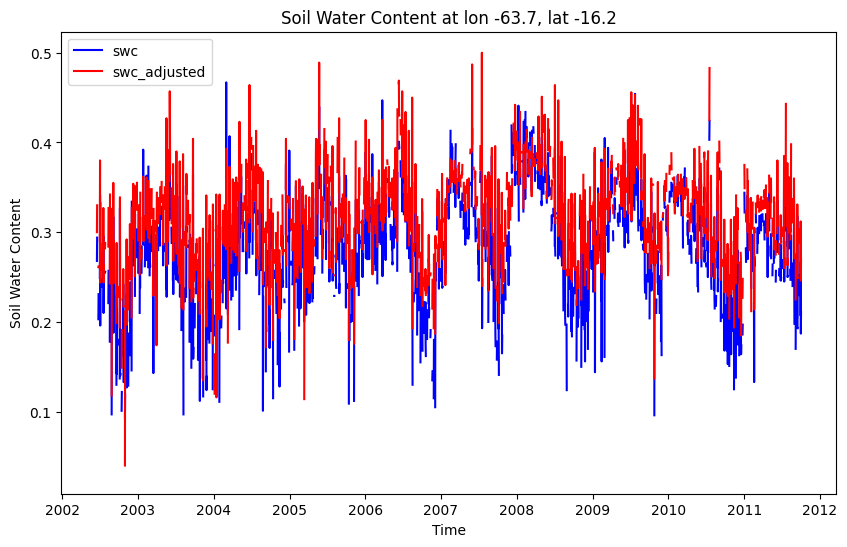

In [32]:
# Select the specific lon and lat by label (or by position) 
lon_label = -63.7
lat_label = -16.2 
# Select the data at the specific location 
ds_location = ds_period1.sel(lon=lon_label, lat=lat_label, method='nearest') 
# Plotting 
plt.figure(figsize=(10, 6)) 
plt.plot(ds_location.time, ds_location.swc, label='swc', color='blue') 
plt.plot(ds_location.time, ds_location.swc_adjusted, label='swc_adjusted', color='red') 
plt.xlabel('Time') 
plt.ylabel('Soil Water Content') 
plt.title(f'Soil Water Content at lon {lon_label}, lat {lat_label}') 
plt.legend() 
plt.show()

In [ ]:
fix, ax = plt.subplots(figsize=(10,6))
sns.lineplot(ds[(abs(df_ini['lon']+63.698198)<0.002) & (abs(df_ini['lat']+16.193694)<0.002)],x='time', y='swc_x')
sns.lineplot(df_ini[(abs(df_ini['lon']+63.698198)<0.002) & (abs(df_ini['lat']+16.193694)<0.002)],x='time', y='swc_y', color = "red")

## CDF Matching function example

In [166]:
x = np.array([5,4,4,3,2,np.nan])
y = np.array([2,1,1,4,np.nan, np.nan])

x_valid = x[~np.isnan(x)]
y_valid = y[~np.isnan(y)]

x_cdf = np.sort(x_valid)
y_cdf = np.sort(y_valid)

x_indices = np.searchsorted(x_cdf, x, side="right")
y_quantiles = x_indices / len(x_cdf)  # Quantiles of x in the valid x range
y_indices = np.floor(y_quantiles * (len(y_cdf)-0)).astype(
    int
)  # Corresponding indices in y

adjusted_x = np.take(y_cdf, y_indices, mode="clip")

In [167]:
adjusted_x

array([4., 4., 4., 1., 1., 4.])

In [168]:
y_indices

array([4, 3, 3, 1, 0, 4])

In [169]:
y_cdf

array([1., 1., 2., 4.])

In [170]:
y_quantiles

array([1. , 0.8, 0.8, 0.4, 0.2, 1. ])

## Example to get data from API

In [ ]:
API_URL = "https://api.suyana.io/drought-bolivia/time-series"
API_KEY = "93a52c7a17676ed586c058e9f5315c9d66b256affd6d955897c7653d71d7fc08"
headers = {
    "Authorization": f"Bearer {API_KEY}"
}

In [88]:
params = {
    "area": 67,  # Climatic area identifier
    "format": "json"  # Output format (optional, default is csv)
}
response = requests.get(API_URL, headers=headers, params=params)
df = pd.json_normalize(response.json())
#df["Time"] = pd.to_datetime(df["Time"])

In [ ]:
df_full = pd.DataFrame()
for id in list_ids:
    try:
        print(id)
        params = {
            "area": id,  # Climatic area identifier
            "format": "json"  # Output format (optional, default is csv)
        }
        response = requests.get(API_URL, headers=headers, params=params)
        df = pd.json_normalize(response.json())
        df["Time"] = pd.to_datetime(df["Time"])
        df["id_lot"] = id

        df_full = pd.concat([df_full, df], axis=0)
    
    except:
        print(f'Wrong id: {id}')

In [89]:
df.columns

Index(['available_areas', 'error', 'message'], dtype='object')

In [95]:
for el in df.available_areas[0]:
    print(el)

104
105
106
107
120
121
122
124
125
126
127
128
129
158
162
163
164
165
166
167
168
169
170
171
172
173
189
190
191
192
194
195
196
198
199
202
207
208
209
210
211
214
215
218
220
237
43
45
49
50
51
52
53
54
55
56
57
70
72
77
78
79
80
81
82
83
84
85
86
87
